In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("TSLA.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

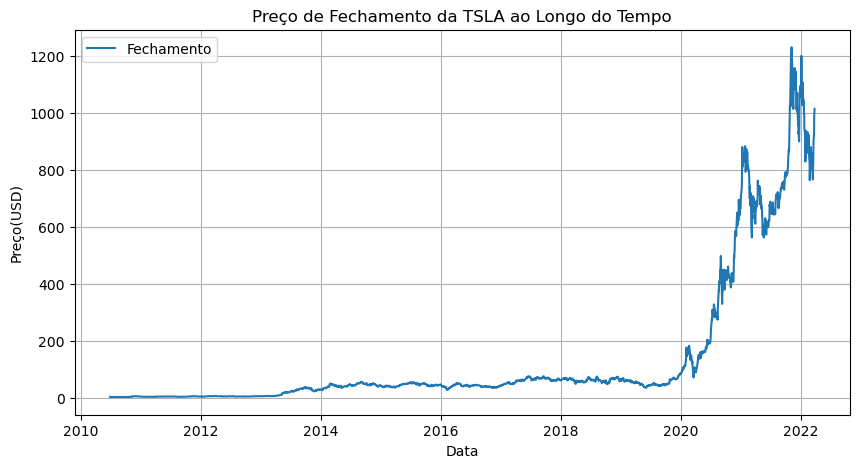

In [5]:
df.set_index('Date', inplace=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

plt.figure(figsize=(10,5))
plt.plot(df["Close"], label= 'Fechamento')
plt.title("Preço de Fechamento da TSLA ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Preço(USD)")
plt.legend()
plt.grid(True)
plt.show()

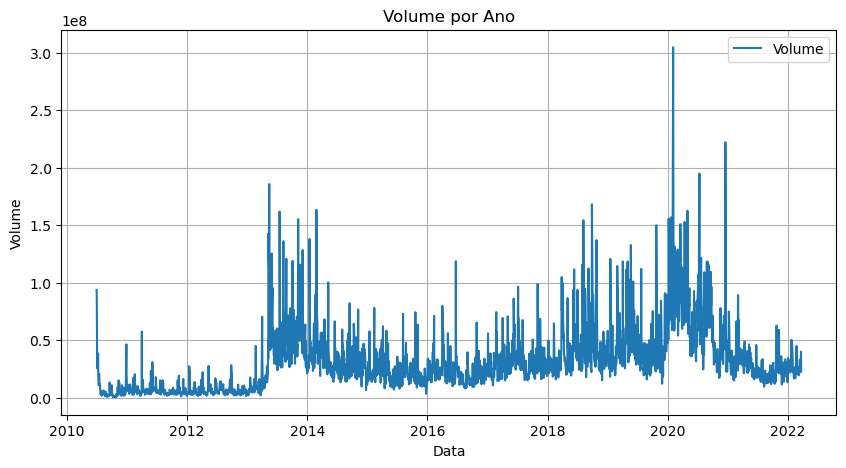

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df["Volume"], label= 'Volume')
plt.title("Volume por Ano")
plt.xlabel("Data")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
df_Sub = df[['Open', 'Close']].copy()


In [8]:
df_Sub['Diferença'] = df_Sub["Close"] - df_Sub["Open"]


In [12]:
df_Sub.index = pd.to_datetime(df_Sub.index)
df_Sub['Ano'] = df_Sub.index.year
df_ano = df_Sub.groupby('Ano')['Diferença'].mean().reset_index()

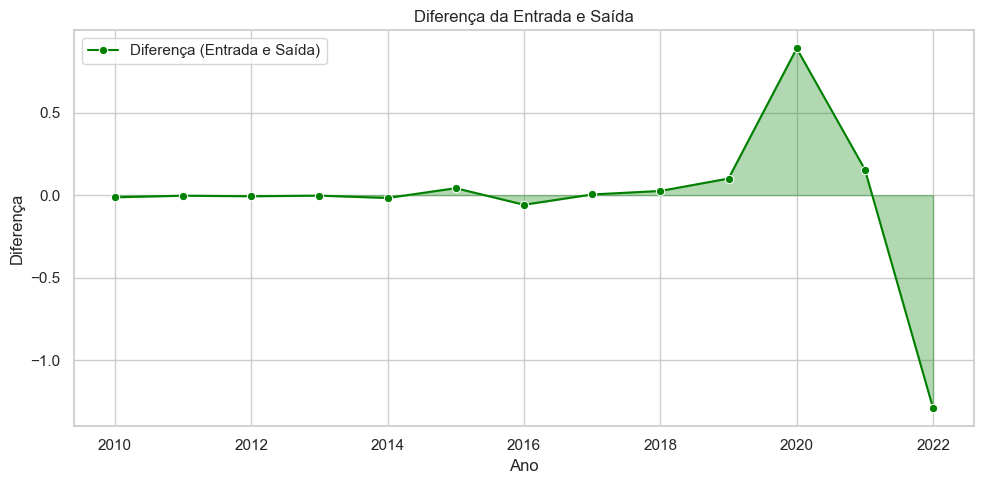

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_ano['Ano'], y=df_ano['Diferença'], marker='o', color='green', label='Diferença (Entrada e Saída)')
plt.fill_between(df_ano['Ano'], df_ano['Diferença'], color='green', alpha=0.3)
plt.title("Diferença da Entrada e Saída")
plt.xlabel("Ano")
plt.ylabel("Diferença")
plt.grid(True)
plt.tight_layout()
plt.show()